In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [2]:
import matplotlib as mpl

mpl.__version__

'3.4.1'

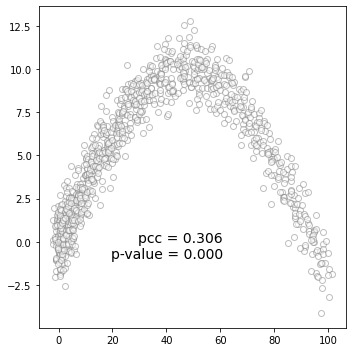

In [3]:
from scipy.stats import pearsonr

# normal distribution - scatter plot
t = np.power(np.linspace(0, 10, 1000), 2)

x = t + np.random.normal(size=1000)
y = 10*np.sin(t/30) + np.random.normal(size=1000)

# pearson coefficient
pcc, pv = pearsonr(x,y)

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x, y, c="w", ec="gray", alpha=0.5)
ax.text(0.6, 0.3, f"pcc = {pcc:0.3f}\np-value = {pv:0.3f}", transform=ax.transAxes, 
        fontsize=14, va="top", ha="right")

fig.set_facecolor("w")
fig.tight_layout()
fig.savefig("69_gs_1.png")

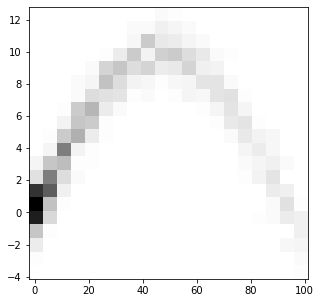

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist2d(x, y, cmap="Greys", bins=20)
fig.savefig("69_gs_2.png")

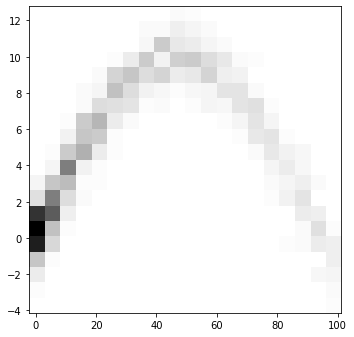

In [5]:
xy_H, xy_edges = np.histogramdd((x, y), bins=20)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(xy_H.T, cmap="Greys",
          extent=[xy_edges[0][0], xy_edges[0][-1], xy_edges[1][-1], xy_edges[1][0]])
ax.invert_yaxis()
ax.set_aspect(6)

fig.set_facecolor("w")
fig.tight_layout()
fig.savefig("69_gs_3.png")

In [6]:
# 2D histogram: https://numpy.org/doc/stable/reference/generated/numpy.argmax.html#numpy.argmax
# index
argmax_x, argmax_y  = np.unravel_index(np.argmax(xy_H, axis=None), xy_H.shape)
print(f"index of maxmum count: ({argmax_x}, {argmax_y})")

# coordinate
bin_delta_xhalf = (xy_edges[0][1] - xy_edges[0][0])/2
bin_delta_yhalf = (xy_edges[1][1] - xy_edges[1][0])/2
x_coord = xy_edges[0][argmax_x] + bin_delta_xhalf
y_coord = xy_edges[1][argmax_y] + bin_delta_yhalf

# generated coordinate
xy_gen = []
xy_gen.append([x_coord, y_coord])

index of maxmum count: (0, 5)


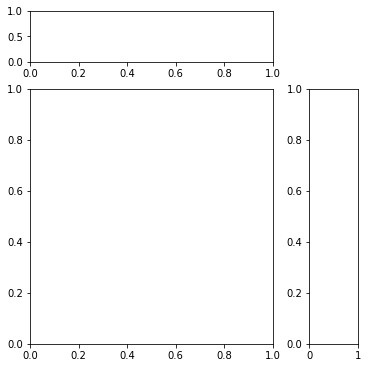

In [7]:
# visualization: subplot_mosaic
# https://matplotlib.org/stable/tutorials/provisional/mosaic.html

fig = plt.figure(figsize=(5, 5), constrained_layout=True)
axd = fig.subplot_mosaic(
    [["dist_x", "BLANK"], ["hist2d", "dist_y"]], 
    empty_sentinel="BLANK",
    gridspec_kw={"height_ratios": [1, 5], "width_ratios": [5, 1]})

fig.savefig("69_gs_4.png")

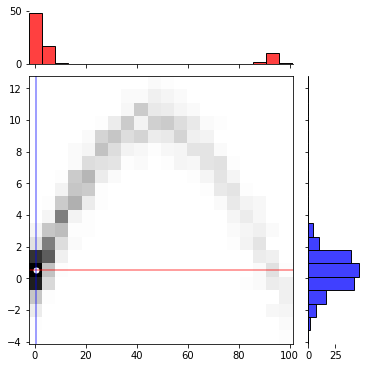

In [8]:
# visualization: data distribution

fig = plt.figure(figsize=(5, 5), constrained_layout=True)
axd = fig.subplot_mosaic(
    [["dist_x", "BLANK"], ["hist2d", "dist_y"]],
    empty_sentinel="BLANK",
    gridspec_kw={"height_ratios": [1, 5], "width_ratios": [5, 1]})

# hist2d
y_pos = y_coord
axd["hist2d"].hist2d(x, y, cmap="Greys", bins=20)
axd["hist2d"].axhline(y_coord, c="r", alpha=0.5)
axd["hist2d"].axvline(x_coord, c="b", alpha=0.5)
axd["hist2d"].scatter(x_coord, y_coord, c="w", ec="k", s=50)

# kdeplot (dist_x)
sns.histplot(x[np.where((y < y_coord+bin_delta_yhalf) & (y > y_coord-bin_delta_yhalf))], 
             color="r", fill=True, bins=xy_edges[0], ax=axd["dist_x"])
axd["dist_x"].spines[["top", "left", "right"]].set_visible(False)
axd["dist_x"].set_xlim(axd["hist2d"].get_xlim())
axd["dist_x"].set_xticklabels([])
axd["dist_x"].set_ylabel("")

# kdeplot (dist_y)
sns.histplot(y=y[np.where((x < x_coord+bin_delta_xhalf) & (x > x_coord-bin_delta_xhalf))], 
             color="b", fill=True, bins=xy_edges[1], ax=axd["dist_y"])
axd["dist_y"].spines[["top", "bottom", "right"]].set_visible(False)
axd["dist_y"].set_ylim(axd["hist2d"].get_ylim())
axd["dist_y"].set_yticklabels([])
axd["dist_y"].set_xlabel("")

fig.set_facecolor("w")
fig.savefig("69_gs_5.png")

In [9]:
from gibbs_sampling import GibbsSampling

df_xy = pd.DataFrame({"x":x, "y":y})
gibbs = GibbsSampling(10000, df_xy, 20)
type(gibbs)

gibbs_sampling.GibbsSampling

In [10]:
gibbs_xy = gibbs.sampling()
print(f"# type: {type(gibbs_xy)}")
print(f"# shape: {gibbs_xy.shape}")
gibbs_x = gibbs_xy[0]
gibbs_y = gibbs_xy[1]

# type: <class 'numpy.ndarray'>
# shape: (2, 10000)


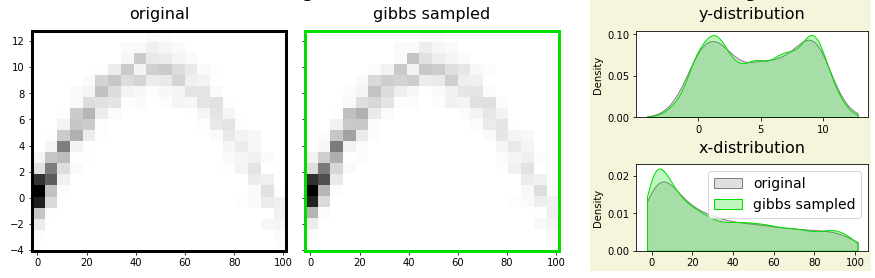

In [17]:
# visualization: data distribution

fig = plt.figure(figsize=(12, 4), constrained_layout=True)
sfigs = fig.subfigures(1, 2, width_ratios=[2, 1], wspace=0.05)

# 2D histogram
sfigs[0].suptitle("2D histogram", fontsize=16, fontweight="bold")

axsL = sfigs[0].subplots(ncols=2, nrows=1, sharex=True, sharey=True)
axsL[0].hist2d(x, y, cmap="Greys", bins=20)               # original
axsL[1].hist2d(gibbs_x, gibbs_y, cmap="Greys", bins=20)  # gibbs sampled

font_title = {"fontsize":16}
axsL[0].set_title("original", fontdict=font_title, pad=12)
axsL[1].set_title("gibbs sampled", fontdict=font_title, pad=12)

axsL[1].spines[["left", "right", "top", "bottom"]].set_color("#00DD00")

for ax in axsL:
    ax.spines[["left", "right", "top", "bottom"]].set_linewidth(3)

# 1D histogram
sfigs[1].suptitle("1D histogram", fontsize=16, fontweight="bold")
sfigs[1].set_facecolor("beige")
axsR = sfigs[1].subplots(ncols=1, nrows=2, squeeze=True)

axsR[1].set_title("x-distribution", fontdict=font_title, pad=12)
sns.kdeplot(x, color="gray", fill=True, cut=0, ax=axsR[1], label="original")
sns.kdeplot(gibbs_x, color="#00DD00", fill=True, cut=0, ax=axsR[1], label="gibbs sampled")
axsR[1].legend(fontsize=14)

axsR[0].set_title("y-distribution", fontdict=font_title, pad=12)
sns.kdeplot(y, color="gray", fill=True, cut=0, ax=axsR[0])
sns.kdeplot(gibbs_y, color="#00DD00", fill=True, cut=0, ax=axsR[0])

fig.set_facecolor("w")
fig.savefig("69_gs_6.png")

In [19]:
# repeated sampling

gibbs_x1, gibbs_y1 = gibbs.sampling(100)
gibbs_x2, gibbs_y2 = gibbs.sampling(1000)
gibbs_x3, gibbs_y3 = gibbs.sampling(10000)

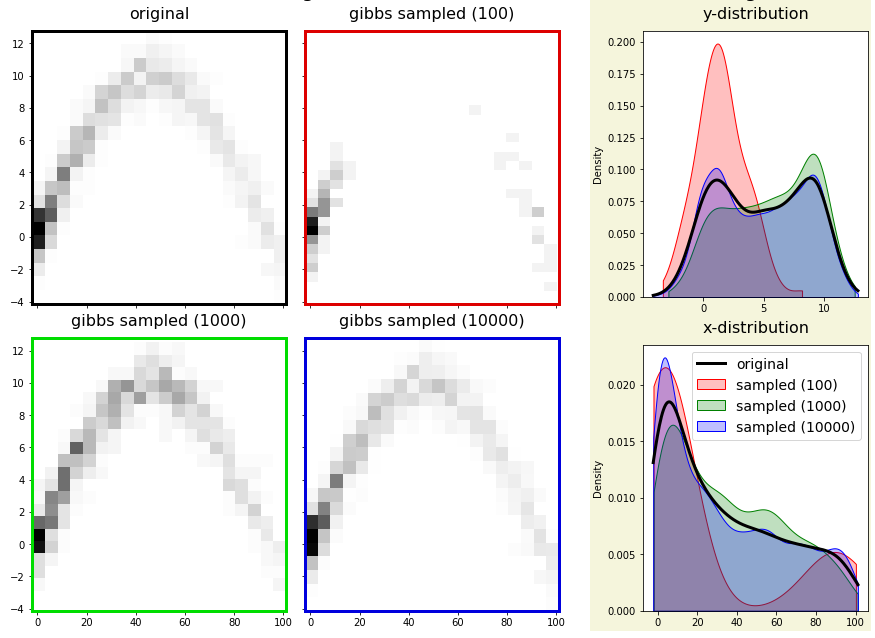

In [20]:
# visualization: data distribution

fig = plt.figure(figsize=(12, 9), constrained_layout=True)
sfigs = fig.subfigures(1, 2, width_ratios=[2, 1], wspace=0.05)

# 2D histogram
sfigs[0].suptitle("2D histogram", fontsize=16, fontweight="bold")

axesL = sfigs[0].subplots(ncols=2, nrows=2, sharex=True, sharey=True)
axsL = axesL.ravel()
axsL[0].hist2d(x, y, cmap="Greys", bins=20)               # original
axsL[1].hist2d(gibbs_x1, gibbs_y1, cmap="Greys", bins=20)  # gibbs sampled1
axsL[2].hist2d(gibbs_x2, gibbs_y2, cmap="Greys", bins=20)  # gibbs sampled2
axsL[3].hist2d(gibbs_x3, gibbs_y3, cmap="Greys", bins=20)  # gibbs sampled3

font_title = {"fontsize":16}
axsL[0].set_title("original", fontdict=font_title, pad=12)
axsL[1].set_title("gibbs sampled (100)", fontdict=font_title, pad=12)
axsL[2].set_title("gibbs sampled (1000)", fontdict=font_title, pad=12)
axsL[3].set_title("gibbs sampled (10000)", fontdict=font_title, pad=12)

for ax, scolor in zip(axsL, ["k", "#D00", "#0D0", "#00D"]):
    ax.spines[["left", "right", "top", "bottom"]].set_color(scolor)
    ax.spines[["left", "right", "top", "bottom"]].set_linewidth(3)

# 1D histogram
sfigs[1].suptitle("1D histogram", fontsize=16, fontweight="bold")
sfigs[1].set_facecolor("beige")
axsR = sfigs[1].subplots(ncols=1, nrows=2, squeeze=True)

axsR[1].set_title("x-distribution", fontdict=font_title, pad=12)
sns.kdeplot(x, color="k", linewidth=3, fill=False, cut=0, ax=axsR[1], zorder=2, label="original")
sns.kdeplot(gibbs_x1, color="red", fill=True, cut=0, ax=axsR[1], label="sampled (100)")
sns.kdeplot(gibbs_x2, color="green", fill=True, cut=0, ax=axsR[1], label="sampled (1000)")
sns.kdeplot(gibbs_x3, color="blue", fill=True, cut=0, ax=axsR[1], label="sampled (10000)")
axsR[1].legend(fontsize=14)

axsR[0].set_title("y-distribution", fontdict=font_title, pad=12)
sns.kdeplot(y, color="k", linewidth=3, fill=False, cut=0, ax=axsR[0], zorder=2)
sns.kdeplot(gibbs_y1, color="red", fill=True, cut=0, ax=axsR[0])
sns.kdeplot(gibbs_y2, color="green", fill=True, cut=0, ax=axsR[0])
sns.kdeplot(gibbs_y3, color="blue", fill=True, cut=0, ax=axsR[0])

fig.set_facecolor("w")
fig.savefig("69_gs_7.png")

* separated data

In [22]:
sx1 = np.random.normal(loc=0, size=1000)
sy1 = np.random.normal(loc=0, size=1000)

sx2 = np.random.normal(loc=10, size=1000)
sy2 = np.random.normal(loc=10, size=1000)

In [23]:
sx = np.concatenate([sx1, sx2])
sy = np.concatenate([sy1, sy2])

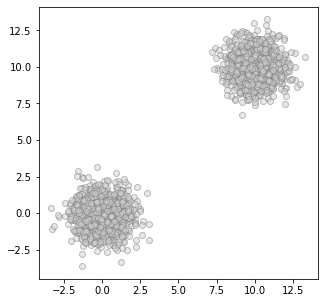

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(sx, sy, c="lightgray", ec="gray", alpha=0.5)
fig.set_facecolor("w")
fig.savefig("69_gs_8.png")

In [25]:
# repeated sampling

df_sep = pd.DataFrame({"x": sx, "y": sy})
gibbs_sep = GibbsSampling(10000, df_sep, 30)

gibbs_sx1, gibbs_sy1 = gibbs_sep.sampling(kfold=1)
gibbs_sx2, gibbs_sy2 = gibbs_sep.sampling(kfold=3)
gibbs_sx3, gibbs_sy3 = gibbs_sep.sampling(kfold=5)

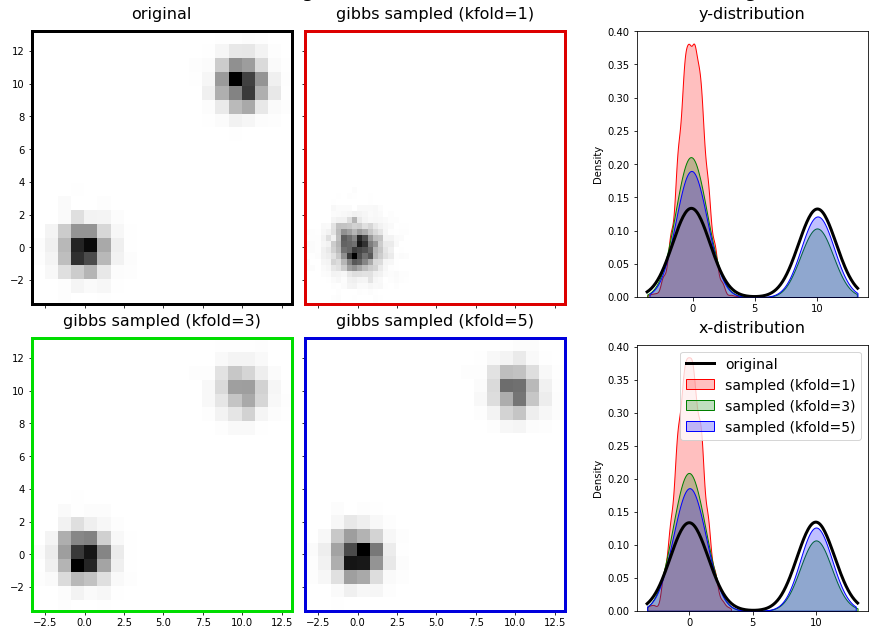

In [26]:
# visualization: data distribution

fig = plt.figure(figsize=(12, 9), constrained_layout=True)
sfigs = fig.subfigures(1, 2, width_ratios=[2, 1], wspace=0.05)

# 2D histogram
sfigs[0].suptitle("2D histogram", fontsize=16, fontweight="bold")

axesL = sfigs[0].subplots(ncols=2, nrows=2, sharex=True, sharey=True)
axsL = axesL.ravel()
axsL[0].hist2d(sx, sy, cmap="Greys", bins=20)               # original
axsL[1].hist2d(gibbs_sx1, gibbs_sy1, cmap="Greys", bins=20)  # gibbs sampled1
axsL[2].hist2d(gibbs_sx2, gibbs_sy2, cmap="Greys", bins=20)  # gibbs sampled2
axsL[3].hist2d(gibbs_sx3, gibbs_sy3, cmap="Greys", bins=20)  # gibbs sampled3

font_title = {"fontsize":16}
axsL[0].set_title("original", fontdict=font_title, pad=12)
axsL[1].set_title("gibbs sampled (kfold=1)", fontdict=font_title, pad=12)
axsL[2].set_title("gibbs sampled (kfold=3)", fontdict=font_title, pad=12)
axsL[3].set_title("gibbs sampled (kfold=5)", fontdict=font_title, pad=12)

for ax, scolor in zip(axsL, ["k", "#D00", "#0D0", "#00D"]):
    ax.spines[["left", "right", "top", "bottom"]].set_color(scolor)
    ax.spines[["left", "right", "top", "bottom"]].set_linewidth(3)

# 1D histogram
sfigs[1].suptitle("1D histogram", fontsize=16, fontweight="bold")
axsR = sfigs[1].subplots(ncols=1, nrows=2, squeeze=True)

axsR[1].set_title("x-distribution", fontdict=font_title, pad=12)
sns.kdeplot(sx, color="k", linewidth=3, fill=False, cut=0, ax=axsR[1], zorder=2, label="original")
sns.kdeplot(gibbs_sx1, color="red", fill=True, cut=0, ax=axsR[1], label="sampled (kfold=1)")
sns.kdeplot(gibbs_sx2, color="green", fill=True, cut=0, ax=axsR[1], label="sampled (kfold=3)")
sns.kdeplot(gibbs_sx3, color="blue", fill=True, cut=0, ax=axsR[1], label="sampled (kfold=5)")
axsR[1].legend(fontsize=14)

axsR[0].set_title("y-distribution", fontdict=font_title, pad=12)
sns.kdeplot(sy, color="k", linewidth=3, fill=False, cut=0, ax=axsR[0], zorder=2)
sns.kdeplot(gibbs_sy1, color="red", fill=True, cut=0, ax=axsR[0])
sns.kdeplot(gibbs_sy2, color="green", fill=True, cut=0, ax=axsR[0])
sns.kdeplot(gibbs_sy3, color="blue", fill=True, cut=0, ax=axsR[0])

fig.set_facecolor("w")
fig.savefig("69_gs_19.png")

* 1D, read from file

In [27]:
gibbs1D = GibbsSampling(10000, x, bins=30)

In [28]:
gibbs1D.input_data.head()

,X0
0,0.135966
1,-2.221450
2,0.704418
3,1.958088
4,0.072286


# (default) exporting as pickle
# Sampling data export complete: gibbs1D.pkl


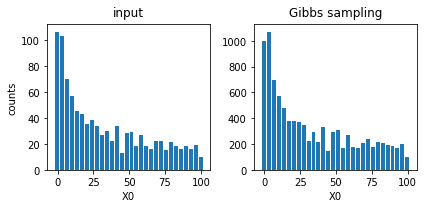

In [29]:
gibbs1D.to_df("gibbs1D")
gibbs1D.plot(filename="gibbs1D_plot.png")

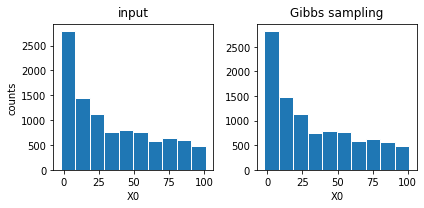

In [30]:
gibbs1D_2nd = GibbsSampling(10000, "gibbs1D.pkl", bins=10)
gibbs1D_2nd.plot(filename="gibbs1D_input.png")

* 3D, save as file

In [31]:
z = 10*np.log(t+1) + np.random.normal(size=1000)

In [32]:
df_3d = pd.DataFrame({"x":x, "y":y, "z":z})
df_3d.head()

,x,y,z
0,0.135966,0.738951,0.449677
1,-2.221450,0.125053,0.986488
2,0.704418,1.009850,0.947132
3,1.958088,-0.449188,0.289042
4,0.072286,0.956453,-0.878795


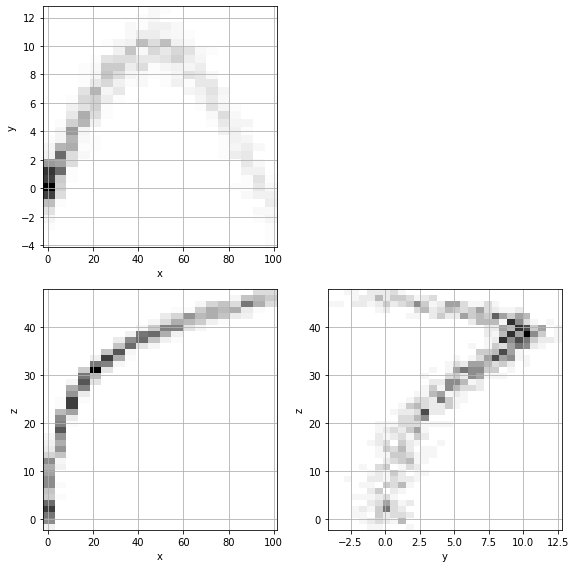

In [34]:
gibbs_3d = GibbsSampling(3000, df_3d, bins=[20, 30, 40])
gibbs_3d.plot(cmap="Greys", figsize=(8, 8), org=True, filename="69_gs_9.png")

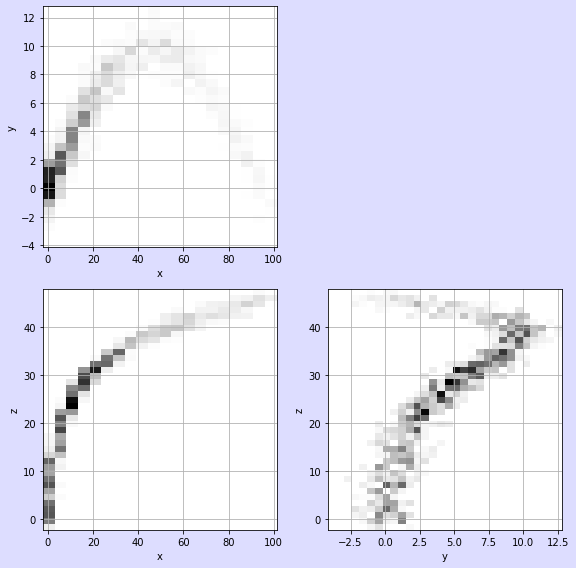

In [37]:
fig = gibbs_3d.plot(cmap="Greys", figsize=(8, 8), org=False, filename="69_gs_10.png")
fig.set_facecolor("#DDF")
fig.savefig("69_gs_10.png")
display(fig)

In [27]:
gibbs_3d_data = gibbs_3d.sampling()

In [ ]:
from matplotlib import animation 

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True,
                        subplot_kw={"projection":"3d"})

def init():
    axs[0].scatter(x, y, z, marker='o', s=30, c="w", ec="gray", alpha=0.6)
    axs[1].scatter(*gibbs_3d_data, marker='o', s=30, c="w", ec="blue", alpha=0.6)
    
    axs[0].set_title("original", fontsize=16, pad=8)
    axs[1].set_title("Gibbs Sampled", fontsize=16, pad=8)
    return fig,

def animate(i):
    axs[0].view_init(elev=10., azim=i)
    axs[1].view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('69_gs_11.gif', fps=30)

MovieWriter ffmpeg unavailable; using Pillow instead.


In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True,
                        subplot_kw={"projection":"3d"})

axs[0].scatter(x, y, z, marker='o', s=30, c="w", ec="gray", alpha=0.6)
axs[1].scatter(*gibbs_3d_data, marker='o', s=30, c="w", ec="blue", alpha=0.6)
axs[0].view_init(elev=30., azim=170)
axs[1].view_init(elev=30., azim=170)
axs[0].set_title("original", fontsize=16, pad=8)
axs[1].set_title("Gibbs Sampled", fontsize=16, pad=8)

fig.savefig("69_gs_00.png")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split()